In [1]:
from models.merge import CNN, BiLSTM, ELMo
from data.Dataset import Dataset
from data.TrainSet import TrainSet
from data.TestSet import TestSet
from utils.utils import plot_words_cloud, plot_words_count, plot_compare_bars, plot_scores
from utils.constants import BOOKS_DIR

2021-11-13 21:55:46,423 : INFO : Loading model from ./elmo/...
2021-11-13 21:55:46,443 : INFO : We will cache the vocabulary of 100 tokens.
d:\study\semester 9\gan_env\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:901: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.LSTMCell` is deprecated and will be "
d:\study\semester 9\gan_env\lib\site-packages\keras\engine\base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chrysalis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Read books

In [2]:
names = ["Pushkin", "Nekrasov"]
dataset = Dataset(names)
dataset.data

,label,author,text
0,0,Pushkin,Александр Пушкин\n19 ОКТЯБРЯ\nРоняет лес багр...
1,1,Nekrasov,Николай Некрасов\nДЕДУШКА\nПосвящается З-н-ч-...


Clean text from punctuation

In [3]:
dataset.preprocess()
dataset.data

Preprocessing:: 100%|██████████| 2/2 [01:30<00:00, 45.04s/it]


,label,author,text
0,0,Pushkin,александр пушкин октябрь ронять лес багряный с...
1,1,Nekrasov,николай некрасов дедушка посвящаться отец каби...


VISUALIZING THE DATA

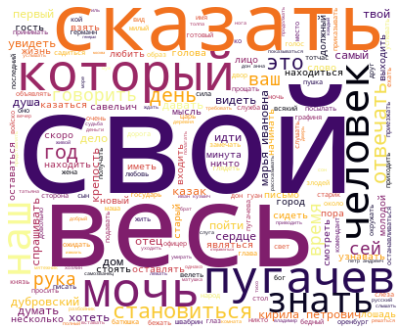

<Figure size 432x288 with 0 Axes>

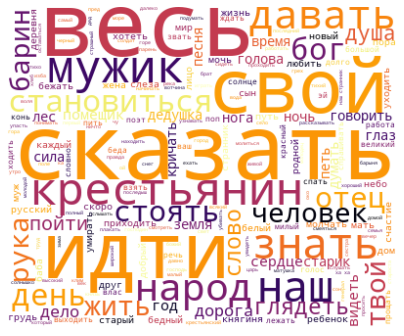

<Figure size 432x288 with 0 Axes>

In [4]:
plot_words_cloud(dataset.data)

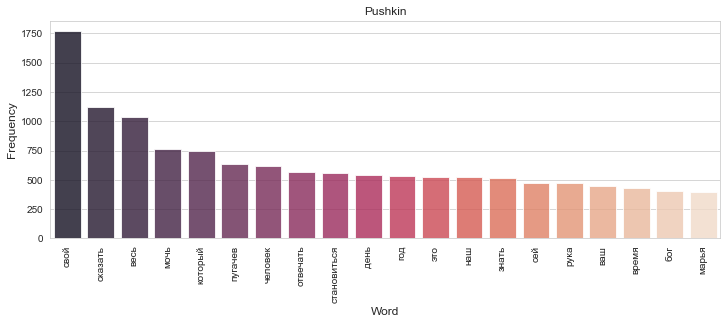

<Figure size 432x288 with 0 Axes>

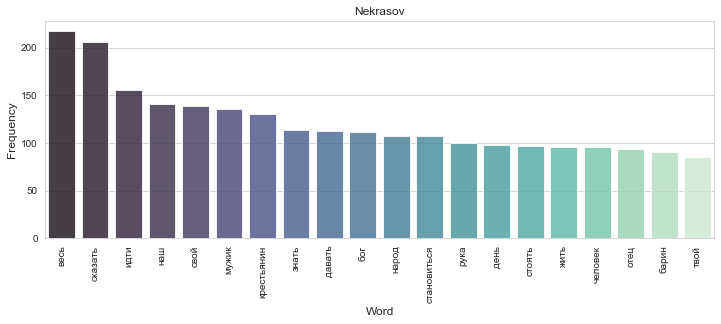

<Figure size 432x288 with 0 Axes>

In [5]:
plot_words_count(dataset.data)

Count and visualize as barplots

d:\study\semester 9\gan_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


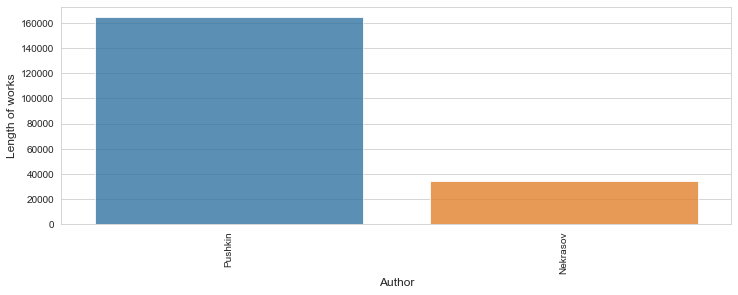

<Figure size 432x288 with 0 Axes>

In [6]:
plot_compare_bars(dataset.data)

In [7]:
dataset.chunking()
dataset.prep_data

,label,author,text
0,0,Pushkin,"[александр, пушкин, октябрь, ронять, лес, багр..."
1,0,Pushkin,"[мочь, пожимать, сердце, рука, пожелать, весел..."
2,0,Pushkin,"[приходить, меж, приходить, кудрявый, наш, пев..."
3,0,Pushkin,"[беспокойный, иль, снова, проходить, тропик, з..."
4,0,Pushkin,"[простереть, море, рука, младой, душа, носить,..."
...,...,...,...
859,1,Nekrasov,"[железный, вынести, господь, посылать, вынести..."
860,1,Nekrasov,"[захохотать, генерал, недавно, стон, ватикан, ..."
861,1,Nekrasov,"[ваш, славянин, англосакс, германец, создавать..."
862,1,Nekrasov,"[скрывать, землянка, рабочий, народ, тесный, г..."


In [8]:
dataset.embedding(ELMo)

2021-11-13 21:57:29,939 : INFO : Warming up ELMo on 40 sentences...
2021-11-13 21:57:33,000 : INFO : Warming up finished.
2021-11-13 21:57:33,007 : INFO : Texts in the current batch: 40
2021-11-13 21:57:33,125 : INFO : Texts in the current batch: 40
2021-11-13 21:57:33,249 : INFO : Texts in the current batch: 40
2021-11-13 21:57:33,373 : INFO : Texts in the current batch: 40
2021-11-13 21:57:33,497 : INFO : Texts in the current batch: 40
2021-11-13 21:57:33,617 : INFO : Texts in the current batch: 40
2021-11-13 21:57:33,744 : INFO : Texts in the current batch: 40
2021-11-13 21:57:33,862 : INFO : Texts in the current batch: 40
2021-11-13 21:57:33,982 : INFO : Texts in the current batch: 40
2021-11-13 21:57:34,102 : INFO : Texts in the current batch: 40
2021-11-13 21:57:34,223 : INFO : Texts in the current batch: 40
2021-11-13 21:57:34,347 : INFO : Texts in the current batch: 40
2021-11-13 21:57:34,478 : INFO : Texts in the current batch: 40
2021-11-13 21:57:34,600 : INFO : Texts in the 

(4978,)

In [9]:
dataset.prep_data

,label,author,text,embeddings
0,0,Pushkin,"[александр, пушкин, октябрь, ронять, лес, багр...","[[-0.23013421893119812, -0.0017669536173343658..."
1,0,Pushkin,"[мочь, пожимать, сердце, рука, пожелать, весел...","[[-0.6251681447029114, 0.172104150056839, -0.1..."
2,0,Pushkin,"[приходить, меж, приходить, кудрявый, наш, пев...","[[0.1366298496723175, -0.12438134849071503, 0...."
3,0,Pushkin,"[беспокойный, иль, снова, проходить, тропик, з...","[[0.04982541501522064, 0.0967579036951065, -0...."
4,0,Pushkin,"[простереть, море, рука, младой, душа, носить,...","[[0.27311480045318604, 0.21392498910427094, 0...."
...,...,...,...,...
859,1,Nekrasov,"[железный, вынести, господь, посылать, вынести...","[[0.4905872344970703, -0.054933056235313416, 0..."
860,1,Nekrasov,"[захохотать, генерал, недавно, стон, ватикан, ...","[[0.25071603059768677, -0.4271829128265381, -0..."
861,1,Nekrasov,"[ваш, славянин, англосакс, германец, создавать...","[[-0.058533038944005966, 0.05495939776301384, ..."
862,1,Nekrasov,"[скрывать, землянка, рабочий, народ, тесный, г...","[[0.19552664458751678, -0.09184488654136658, 0..."


In [10]:
train_set = TrainSet(dataset.prep_data)
train_set.shape

,Train,Test
X,"(3596, 40, 1024)","(747, 40, 1024)"
Y,"(3596,)","(747,)"


In [11]:
cnn = CNN(train_set.X_shape())

Model: "CNN"
____________________________________________________________________________________________________________________________________________
Layer (type)                                  Output Shape                   Param #         Connected to                                   
input_1 (InputLayer)                          [(None, 40, 1024)]             0                                                              
____________________________________________________________________________________________________________________________________________
conv1d (Conv1D)                               (None, 38, 200)                614600          input_1[0][0]                                  
____________________________________________________________________________________________________________________________________________
conv1d_1 (Conv1D)                             (None, 37, 200)                819400          input_1[0][0]                                  


Train on 3596 samples, validate on 635 samples
Epoch 1/10


d:\study\semester 9\gan_env\lib\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


3596/3596 - 4s - loss: 0.4138 - acc: 0.8409 - val_loss: 0.1965 - val_acc: 0.9228
Epoch 2/10
3596/3596 - 1s - loss: 0.2124 - acc: 0.9138 - val_loss: 0.1623 - val_acc: 0.9228
Epoch 3/10
3596/3596 - 1s - loss: 0.1410 - acc: 0.9455 - val_loss: 0.1380 - val_acc: 0.9354
Epoch 4/10
3596/3596 - 1s - loss: 0.0849 - acc: 0.9689 - val_loss: 0.1421 - val_acc: 0.9417
Epoch 5/10
3596/3596 - 1s - loss: 0.0422 - acc: 0.9869 - val_loss: 0.2921 - val_acc: 0.9244
Epoch 6/10
3596/3596 - 1s - loss: 0.0391 - acc: 0.9855 - val_loss: 0.1916 - val_acc: 0.9449
Epoch 7/10
3596/3596 - 1s - loss: 0.0195 - acc: 0.9936 - val_loss: 0.1915 - val_acc: 0.9480
Epoch 8/10
3596/3596 - 1s - loss: 0.0085 - acc: 0.9983 - val_loss: 0.1991 - val_acc: 0.9465
Epoch 9/10
3596/3596 - 1s - loss: 0.0108 - acc: 0.9961 - val_loss: 0.1794 - val_acc: 0.9465
Epoch 10/10
3596/3596 - 1s - loss: 0.0085 - acc: 0.9978 - val_loss: 0.2077 - val_acc: 0.9449
Train: 1.000, Test: 0.9411


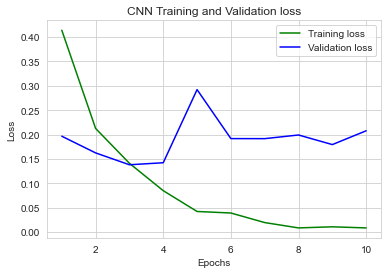

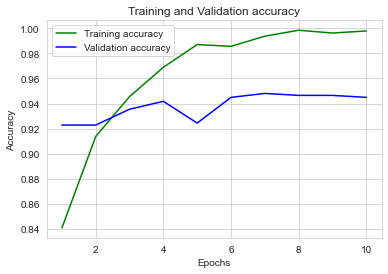

<Figure size 432x288 with 0 Axes>

In [12]:
cnn.fit(train_set)

In [13]:
cnn.predict(train_set)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

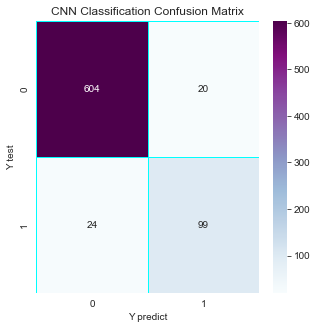

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       624
           1       0.83      0.80      0.82       123

    accuracy                           0.94       747
   macro avg       0.90      0.89      0.89       747
weighted avg       0.94      0.94      0.94       747



array([[604,  20],
       [ 24,  99]], dtype=int64)

In [14]:
cnn.confusion_matrix(train_set)

In [15]:
score_a = cnn.validation(train_set)

In [16]:
bilstm = BiLSTM(train_set.X_shape())

Model: "BiLSTM"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input_2 (InputLayer)                [(None, 40, 1024)]              0           
________________________________________________________________________________
bidirectional (Bidirectional)       (None, 400)                     1960000     
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 400)                     0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 30)                      12030       
________________________________________________________________________________
dropout_2 (Dropout)                 (None, 30)                      0           
________________________________________________________________________________
dense_3 (Den

Train on 3596 samples, validate on 635 samples
Epoch 1/10


d:\study\semester 9\gan_env\lib\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


3596/3596 - 7s - loss: 0.3054 - acc: 0.8732 - val_loss: 0.1779 - val_acc: 0.9197
Epoch 2/10
3596/3596 - 6s - loss: 0.1774 - acc: 0.9274 - val_loss: 0.2269 - val_acc: 0.9102
Epoch 3/10
3596/3596 - 6s - loss: 0.1415 - acc: 0.9416 - val_loss: 0.1690 - val_acc: 0.9291
Epoch 4/10
3596/3596 - 6s - loss: 0.0885 - acc: 0.9650 - val_loss: 0.2391 - val_acc: 0.9260
Epoch 5/10
3596/3596 - 6s - loss: 0.0619 - acc: 0.9744 - val_loss: 0.1602 - val_acc: 0.9449
Epoch 6/10
3596/3596 - 5s - loss: 0.0276 - acc: 0.9908 - val_loss: 0.2430 - val_acc: 0.9339
Epoch 7/10
3596/3596 - 6s - loss: 0.0090 - acc: 0.9981 - val_loss: 0.2768 - val_acc: 0.9323
Epoch 8/10
3596/3596 - 6s - loss: 0.0111 - acc: 0.9967 - val_loss: 0.2235 - val_acc: 0.9386
Epoch 9/10
3596/3596 - 5s - loss: 0.0082 - acc: 0.9981 - val_loss: 0.2656 - val_acc: 0.9370
Epoch 10/10
3596/3596 - 6s - loss: 0.0053 - acc: 0.9986 - val_loss: 0.2665 - val_acc: 0.9417
Train: 0.998, Test: 0.9250


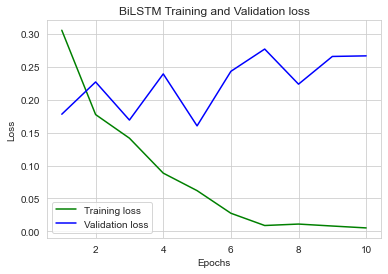

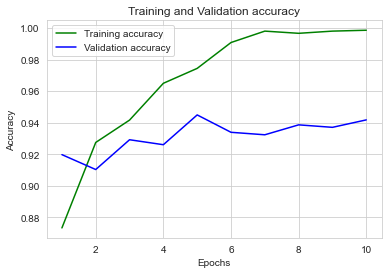

<Figure size 432x288 with 0 Axes>

In [17]:
bilstm.fit(train_set)

In [18]:
bilstm.predict(train_set)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

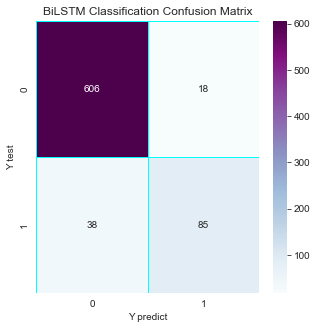

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       624
           1       0.83      0.69      0.75       123

    accuracy                           0.93       747
   macro avg       0.88      0.83      0.85       747
weighted avg       0.92      0.93      0.92       747



array([[606,  18],
       [ 38,  85]], dtype=int64)

In [19]:
bilstm.confusion_matrix(train_set)

In [20]:
score_b = bilstm.validation(train_set)

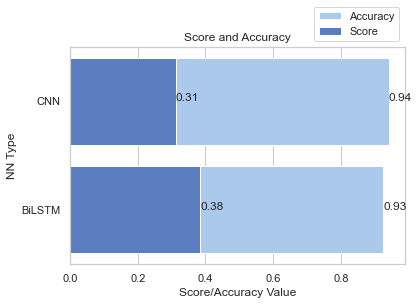

<Figure size 432x288 with 0 Axes>

In [21]:
plot_scores(score_a, score_b)

In [22]:
if score_a[0] > score_b[0]:
    print("We prefer to choose CNN for this dataset evaluation")
else:
    print("We prefer to choose BiLSTM for this dataset evaluation")

We prefer to choose BiLSTM for this dataset evaluation


Embeddings loaded successfully


d:\study\semester 9\gan_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


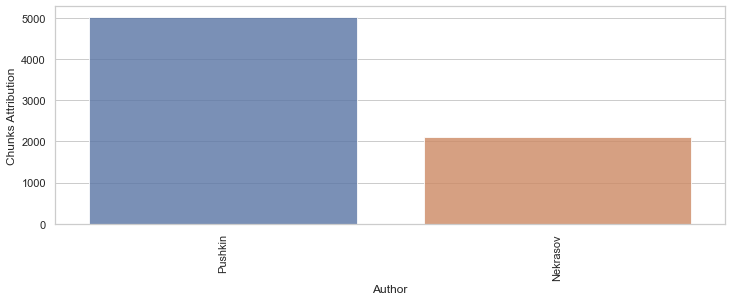

<Figure size 432x288 with 0 Axes>

In [23]:
path = f"{BOOKS_DIR}/Sholokhov/and-quiet-flows-the-don.txt"
testing = TestSet(path, names, ELMo)
testing.dataframe = bilstm.make_prediction(testing)
testing.plot_prediction()